<a href="https://colab.research.google.com/github/kimvc7/Robustness/blob/main/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle 
import os 
import seaborn as sns
sns.set_theme(style="ticks")
sns.set_context("poster")


Add a google drive link to https://drive.google.com/drive/folders/1nHsaKCqv5YG-1CC9SRhSXUc5u6nnNokx?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Load data
df_datasets = pd.read_csv('/content/gdrive/MyDrive/RUB-results/UCI/dataset.csv')
df_results = pd.read_csv('/content/gdrive/MyDrive/RUB-results/UCI/uci.csv')
df_results_norm = pd.read_csv('/content/gdrive/MyDrive/RUB-results/UCI/uci_norm.csv')


df_results["num_features"] = -1
df_results["num_examples"] = -1
for dataset in list(set(df_results.dataset)):
    dataset_descr = df_datasets[df_datasets.dataset_id==dataset]
    df_results.loc[df_results.dataset==dataset,'num_features'] = int(dataset_descr.num_features)
    df_results.loc[df_results.dataset==dataset, 'num_examples'] = int(dataset_descr.num_examples)

df_results["rank"] = df_results.groupby(['net', 'dataset','test_epsilon','attack'])["accuracy"].rank("dense", ascending=False)
#df_results= df_results[df_results["robust_training"] != "aRUB_L1" ]
#df_results= df_results[df_results["net"] == "ThreeLayer" ]


In [ ]:
df_results_norm = pd.read_csv('/content/gdrive/MyDrive/RUB-results/UCI/uci_norm.csv')
#df_results_norm = df_results_norm[df_results_norm["robust_training"] != "aRUB_L1" ]
#df_results_norm = df_results_norm[df_results_norm["net"] == "ThreeLayer" ]
df_results_norm['test_epsilon'] = 10**np.round(np.log10(df_results_norm['test_epsilon']))
df_results_norm = df_results_norm.groupby(['test_epsilon', 'net', 'dataset','attack', 'robust_training']).agg(accuracy = ('accuracy', 'mean')).reset_index()
df_results_norm["rank"] = df_results_norm.groupby(['net', 'dataset','test_epsilon','attack'])["accuracy"].rank("dense", ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


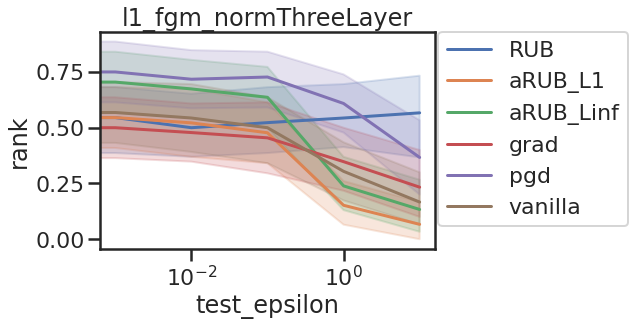

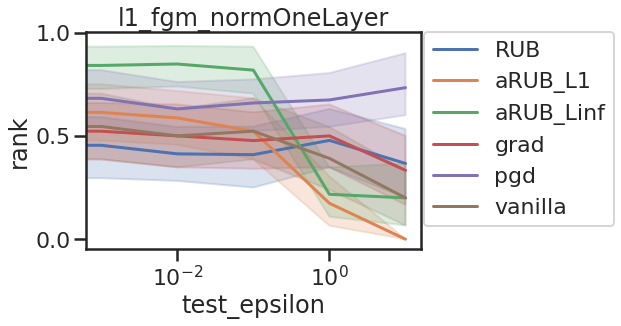

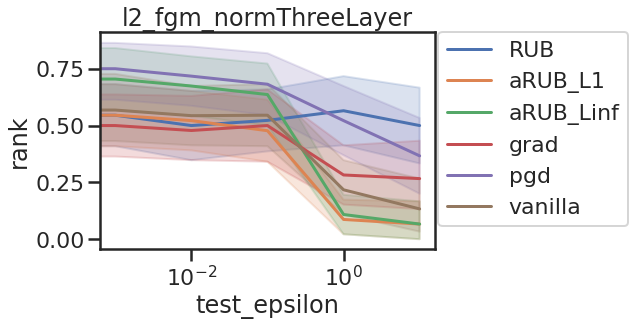

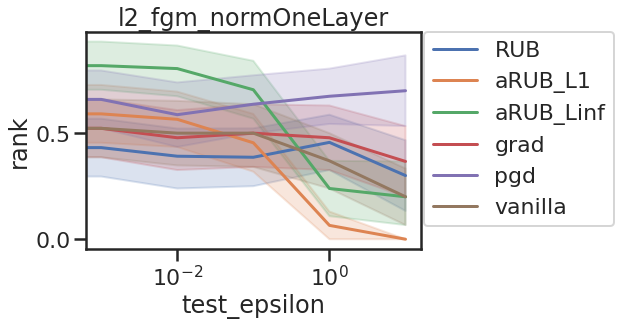

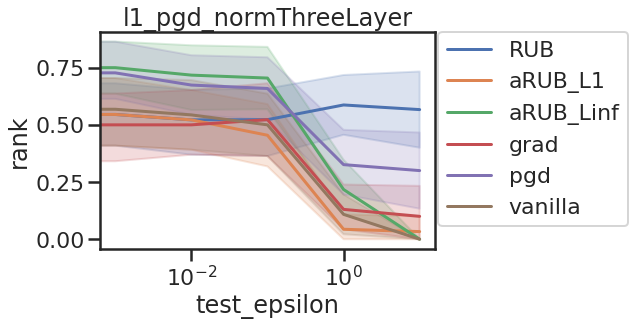

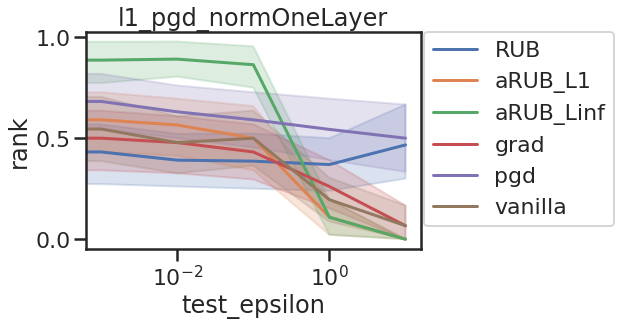

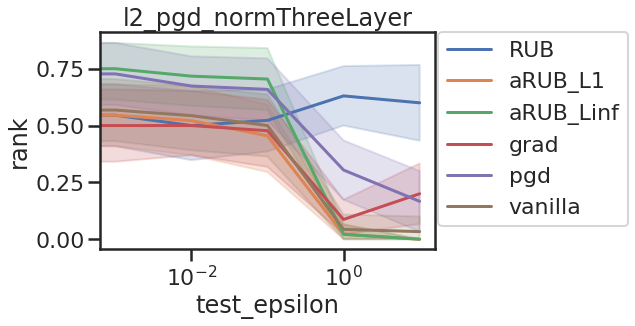

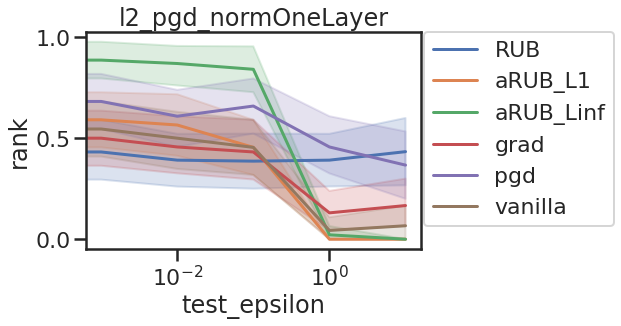

In [ ]:
df_results_norm["rank"] = df_results_norm.groupby(['net', 'dataset','test_epsilon','attack'])["accuracy"].rank("dense", ascending=False)
df_results_norm["rank"] = (df_results_norm["rank"] == 1)

for attack in list(set(df_results_norm.attack)):
  for net in list(set(df_results_norm.net)):
      plt.figure()
      sns.lineplot(x="test_epsilon", y="rank",
                      hue="robust_training",
                      data=df_results_norm[(df_results_norm.net==net) & (df_results_norm.attack==attack)]).set_title(attack+net)
      plt.xscale('log')
      plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
      

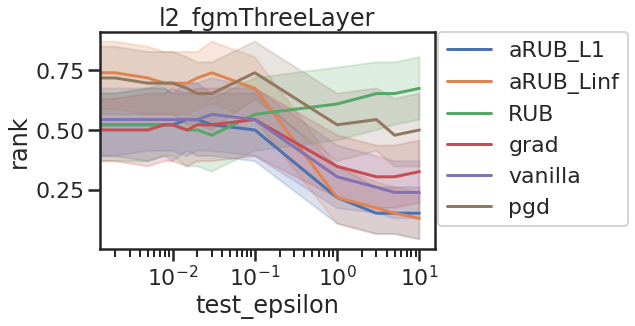

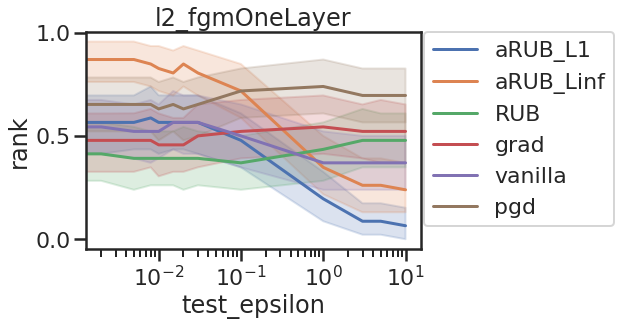

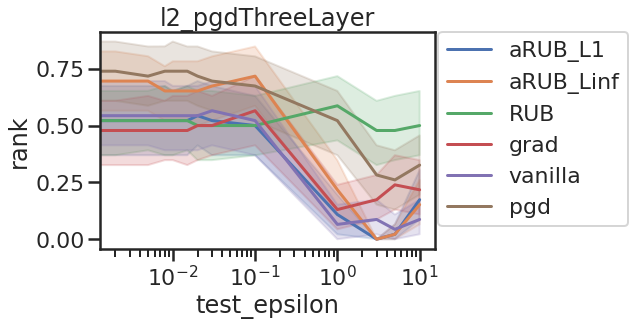

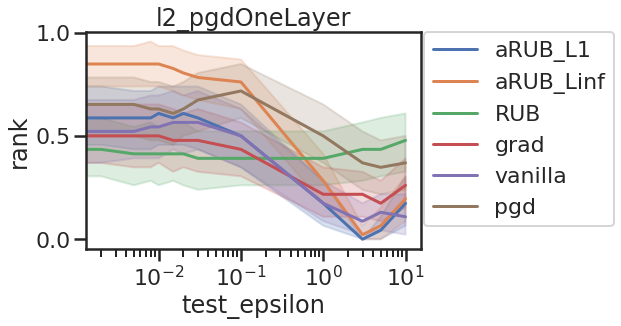

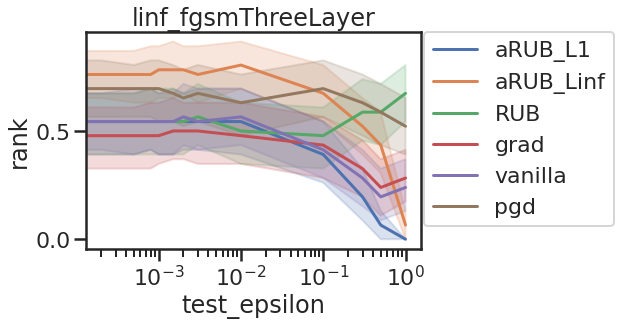

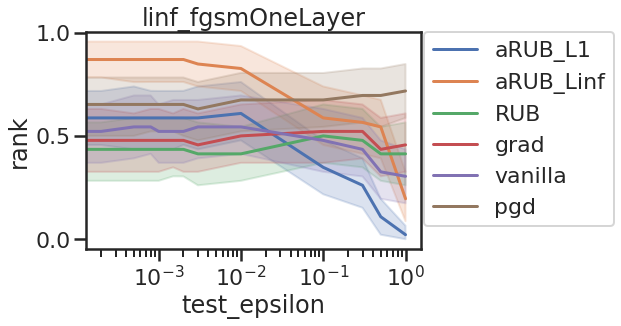

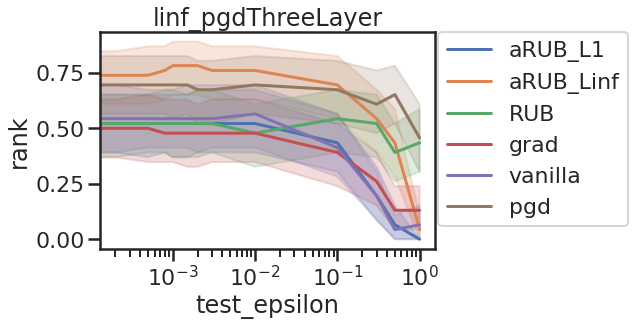

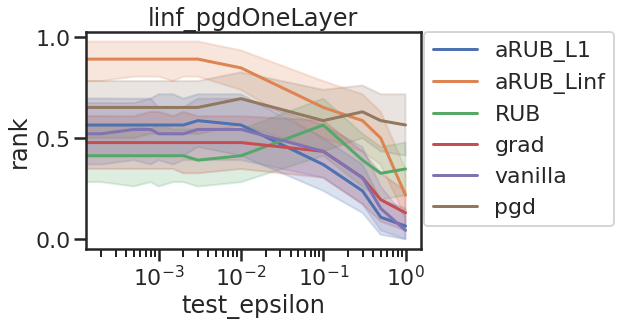

In [ ]:
df_results["rank"] = df_results.groupby(['net', 'dataset','test_epsilon','attack'])["accuracy"].rank("dense", ascending=False)
df_results["rank"] = (df_results["rank"] == 1)

for attack in list(set(df_results.attack)):
  for net in list(set(df_results.net)):
      plt.figure()
      sns.lineplot(x="test_epsilon", y="rank",
                      hue="robust_training",
                      data=df_results[(df_results.net==net) & (df_results.attack==attack)]).set_title(attack+net)
      plt.xscale('log')
      plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)


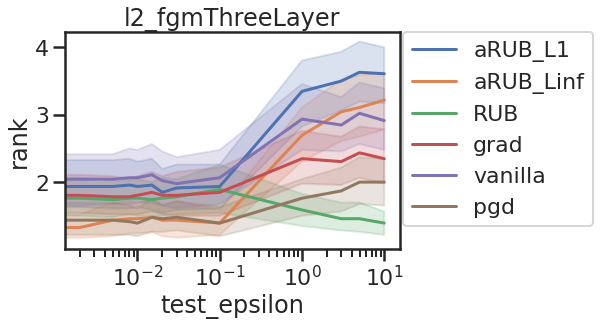

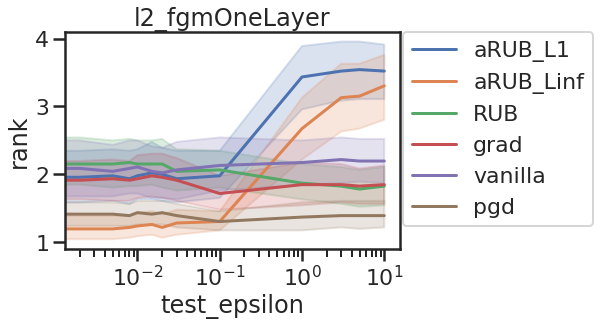

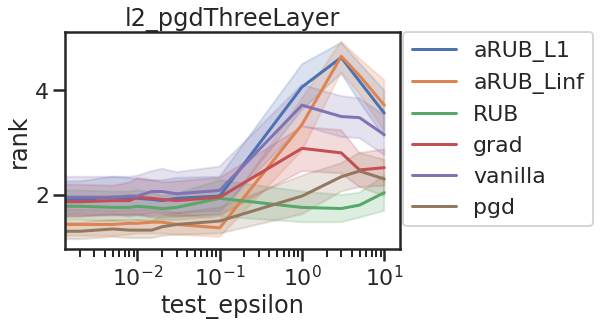

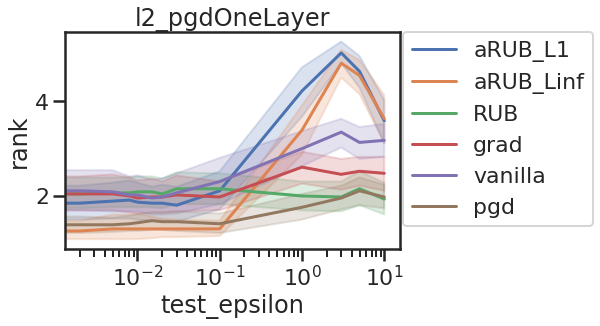

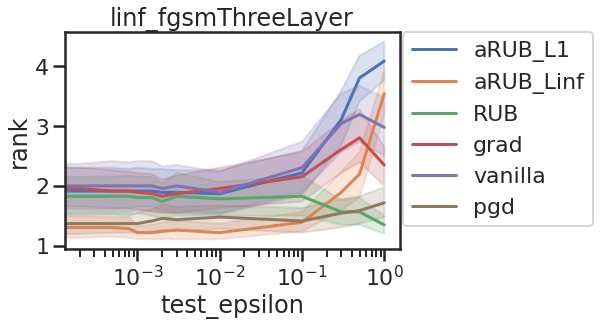

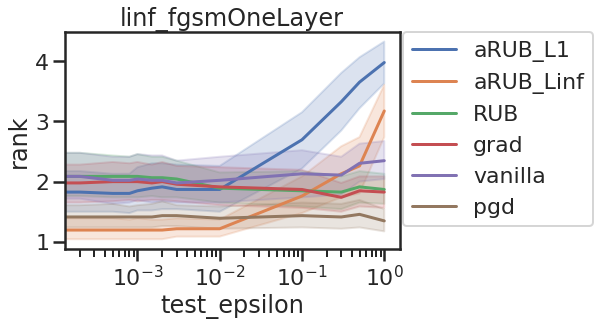

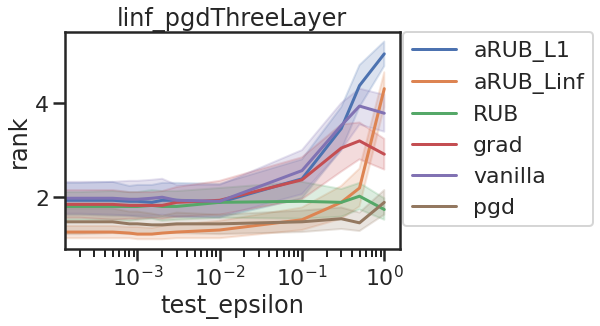

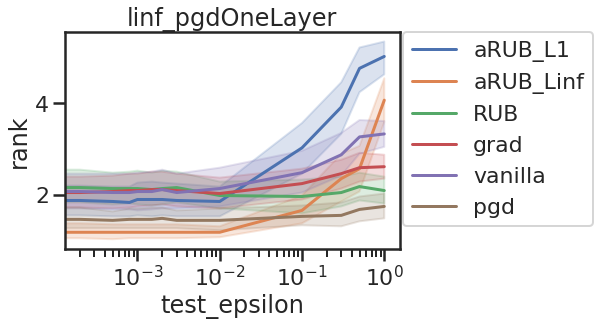

In [ ]:
df_results["rank"] = df_results.groupby(['net', 'dataset','test_epsilon','attack'])["accuracy"].rank("dense", ascending=False)

for attack in list(set(df_results.attack)):
  for net in list(set(df_results.net)):
      plt.figure()
      sns.lineplot(x="test_epsilon", y="rank",
                      hue="robust_training",
                      data=df_results[(df_results.net==net) & (df_results.attack==attack)]).set_title(attack+net)
      plt.xscale('log')
      plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
attack_names = {"linf_fgsm":"FGSM-" + r"$L_{\infty}$", "linf_pgd":"PGD-"+ r"$L_{\infty}$", "l2_pgd_norm":"PGD-"+ r"$L_{2}$", "l2_fgm_norm":"FGM-"+ r"$L_{2}$", 'l1_fgm_norm':"FGM-"+ r"$L_{1}$" , 'l1_pgd_norm':"PGD-"+ r"$L_{1}$"}
method_names = {"RUB":"RUB-"+r"$L_1$", "pgd": "PGD-"+r"$L_\infty$", "aRUB_Linf":"ARUB-"+r"$L_\infty$", "aRUB_L1": "ARUB-"+r"$L_1$","vanilla": "Nominal", "grad": "Baseline-"+r"$L_\infty$"}

In [ ]:
def change_names(df):
  df2 = df_datasets.replace("RUB", "RUB-"+r"$L_1$")
  df = df.replace("pgd", "PGD-"+r"$L_\infty$")
  df = df.replace("aRUB_Linf", "ARUB-"+r"$L_\infty$")
  df = df.replace("aRUB_L1", "ARUB-"+r"$L_1$")
  df = df.replace("vanilla", "Nominal")
  df = df.replace("grad", "Baseline-"+r"$L_\infty$")
  return df

In [ ]:
def plot_improvement_amount(df, attack, net, method_1, method_2, epsilons, color, granularity): 
    df = df[df['net'] == net]
    df = df[df['attack'] == attack]
    df = df.pivot_table('accuracy', ['dataset', 'test_epsilon'], 'robust_training').reset_index()
    
    fig = plt.figure()
    
    for eps in epsilons:
      
        df_eps = df[df['test_epsilon'] == eps]
        hist = (df_eps[method_1] -  df_eps[method_2])/df_eps[method_2]
        commutes = pd.Series(hist*100)
        plt.figure(figsize=(10,7))
        commutes.plot.hist(grid=True, bins=granularity, rwidth=0.8, color=color)
        m1 = method_names[method_1]
        m2 = method_names[method_2]
        #plt.title(m1 + ' improvement over ' +m2 + '\n' + r"$\rho$ = "  + str(eps) + ', attack = ' +attack_names[attack], size = 20)
        plt.ylabel('Number of UCI datasets', size = 20)
        plt.xlabel('Improvement (%)', size = 20)
        plt.grid(axis='x', alpha=0.75)
        sv_path = '/content/gdrive/MyDrive/ROBUSTNESS/'
        plt.savefig(sv_path + method_1 + ' improvement over ' +method_2 + '\rho = '  + str(eps) + ', attack = ' +attack_names[attack]+".pdf" , dpi=400, bbox_inches = 'tight')

    

<Figure size 432x288 with 0 Axes>

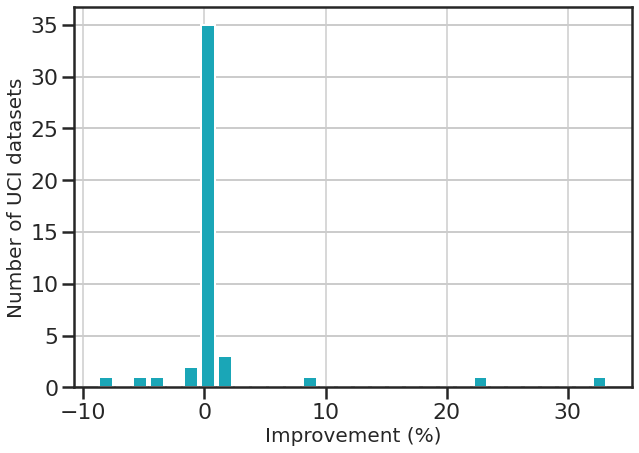

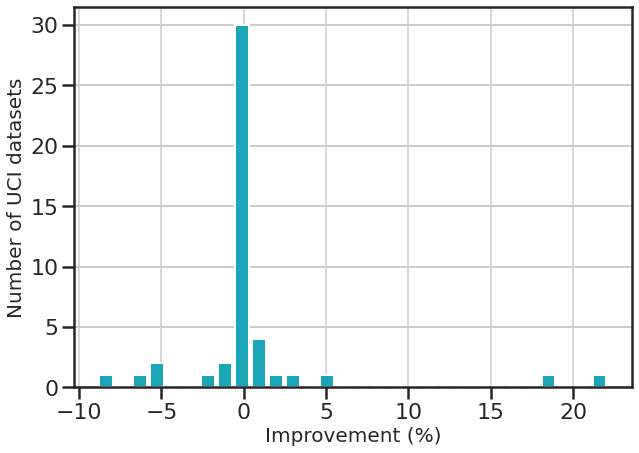

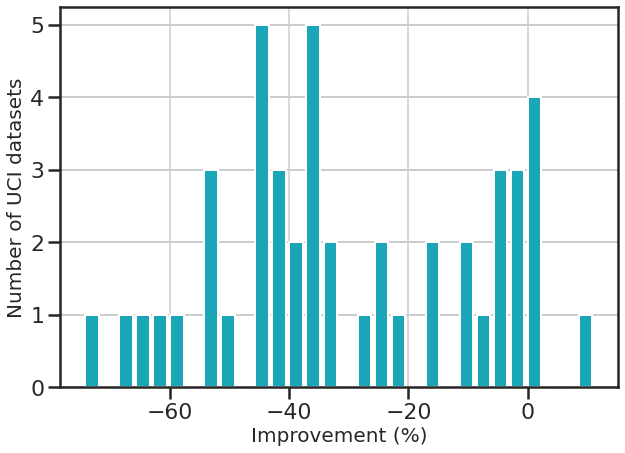

In [ ]:
linf_epsilons = [0.001, 0.1, 1]
plot_improvement_amount(df_results, 'linf_pgd', 'ThreeLayer', 'aRUB_Linf', 'pgd', linf_epsilons, '#1AA6B7', 30)

<Figure size 432x288 with 0 Axes>

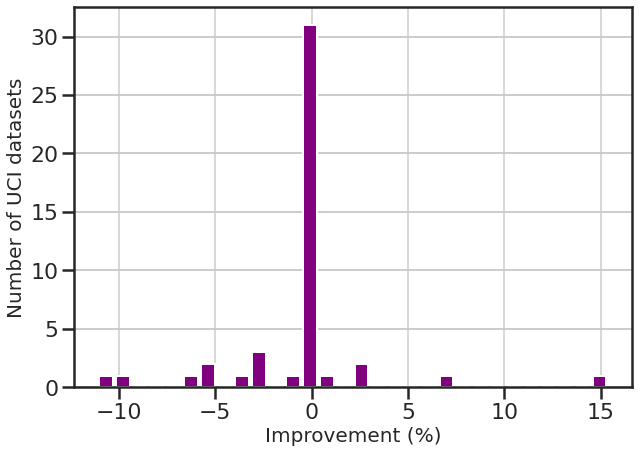

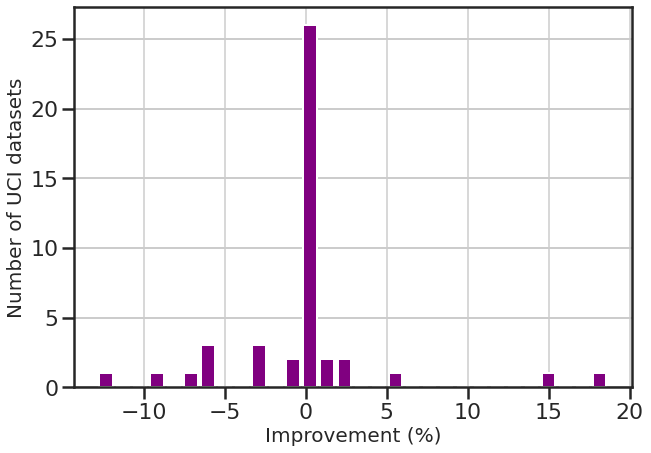

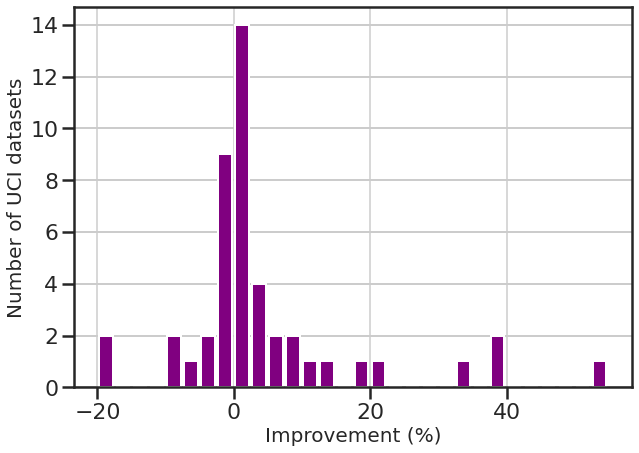

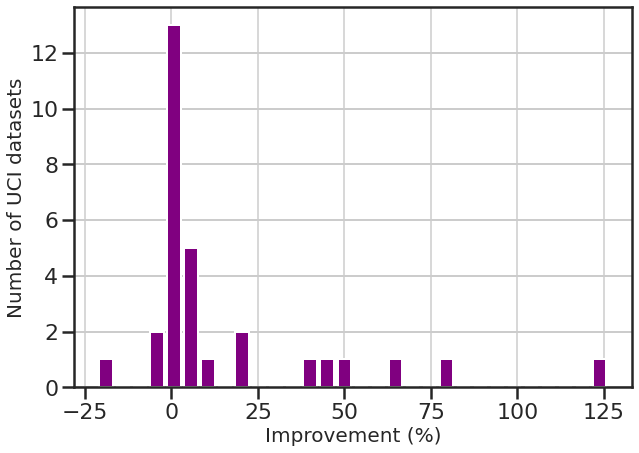

In [ ]:
linf_epsilons = [ 0.01, 0.1, 1, 10]#[, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]
plot_improvement_amount(df_results_norm, 'l2_pgd_norm', 'ThreeLayer', 'RUB', 'pgd', linf_epsilons, 'purple', 30)

<Figure size 432x288 with 0 Axes>

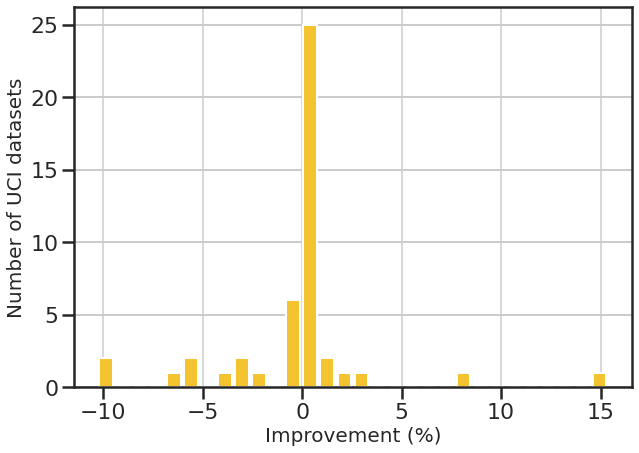

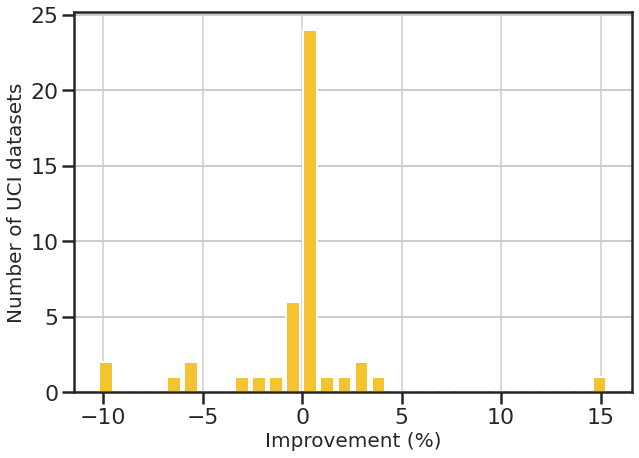

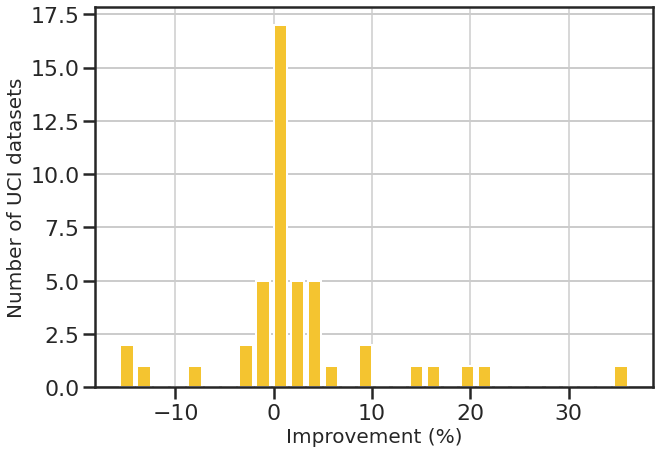

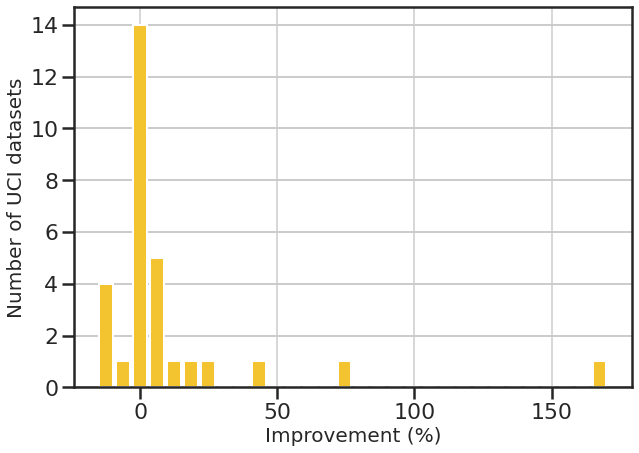

In [ ]:
linf_epsilons = [ 0.01, 0.1, 1, 10]#[, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]
plot_improvement_amount(df_results_norm, 'l1_pgd_norm', 'ThreeLayer', 'RUB', 'pgd', linf_epsilons, '#F4C430', 30)

In [ ]:
df_results = change_names(df_results)
df_results_norm = change_names(df_results_norm)

In [ ]:
df_results= df_results[df_results['robust_training']!='ARUB-$L_1$']

In [ ]:
df_results_norm = df_results_norm[df_results_norm['robust_training']!='ARUB-$L_1$']

In [ ]:
df_results["robust_training"].unique()

array(['ARUB-$L_\\infty$', 'RUB', 'Baseline-$L_\\infty$', 'Nominal',
       'PGD-$L_\\infty$'], dtype=object)

In [ ]:
sorter = ['RUB', 'ARUB-$L_\\infty$', 'Baseline-$L_\\infty$',
       'PGD-$L_\\infty$', 'Nominal']
df_results['robust_training'] = df_results['robust_training'].astype("category")
df_results['robust_training'].cat.set_categories(sorter, inplace=True)
df_results = df_results.sort_values(['robust_training'])
df_results["robust_training"].unique()

['RUB', 'ARUB-$L_\infty$', 'Baseline-$L_\infty$', 'PGD-$L_\infty$', 'Nominal']
Categories (5, object): ['RUB', 'ARUB-$L_\infty$', 'Baseline-$L_\infty$', 'PGD-$L_\infty$',
                         'Nominal']

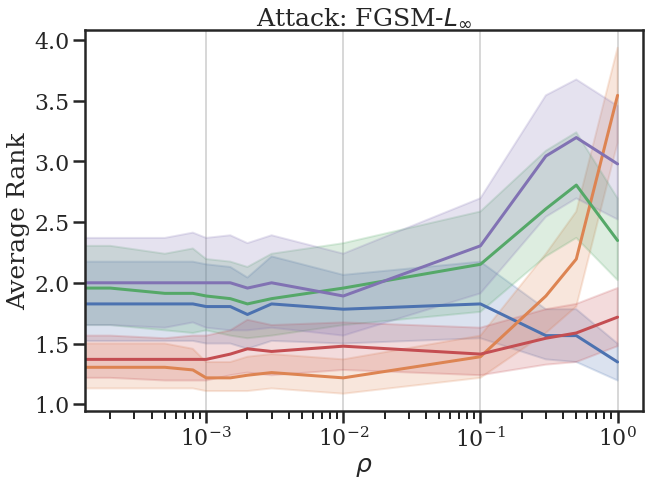

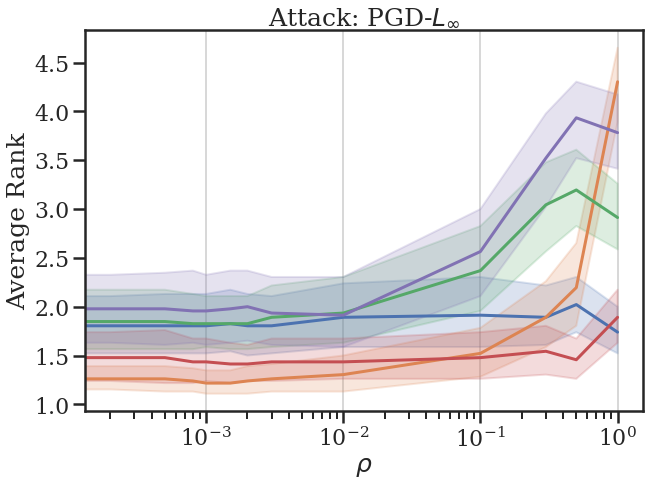

In [ ]:
for attack in ["linf_fgsm", "linf_pgd"]:
  for net in ['ThreeLayer']:
      fig, ax = plt.subplots(figsize=(10,7))
      plt.rcParams["font.family"] = "serif"
      #plt.figure(figsize=(10,7))
      g = sns.lineplot(x="test_epsilon", y="rank",
                      hue="robust_training",
                      data=df_results[(df_results.net==net) & (df_results.attack==attack)]).set_title("Attack: " +attack_names[attack], size=25)

      handles, labels = ax.get_legend_handles_labels()
      #ax.legend(handles=handles[0:], labels=labels[0:])
      ax.get_legend().remove()
      plt.xscale('log')
      plt.xlabel(r"$\rho$", size = 25)
      plt.ylabel("Average Rank", size = 25)
      plt.grid(axis='x', alpha=0.75)
      sv_path = '/content/gdrive/MyDrive/ROBUSTNESS/'
      plt.savefig(sv_path +"avg_rank_" +attack_names[attack] +"_attack_new.png" , dpi=400, bbox_inches = 'tight')


In [ ]:
df_results_norm2 = pd.read_csv('/content/gdrive/MyDrive/RUB-results/UCI/uci_norm.csv')
a = 10
df_results_norm2['test_epsilon'] = 10**np.round(np.log10(df_results_norm2['test_epsilon']))
df_results_norm2.groupby(['test_epsilon']).agg(num_datasets=('dataset','nunique'))

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,num_datasets
test_epsilon,
0.000,46
0.001,44
0.010,46
0.100,44
1.000,46
10.000,30


In [ ]:
df_results_norm["robust_training"].unique()

array(['RUB', 'ARUB-$L_\\infty$', 'Baseline-$L_\\infty$',
       'PGD-$L_\\infty$', 'Nominal'], dtype=object)

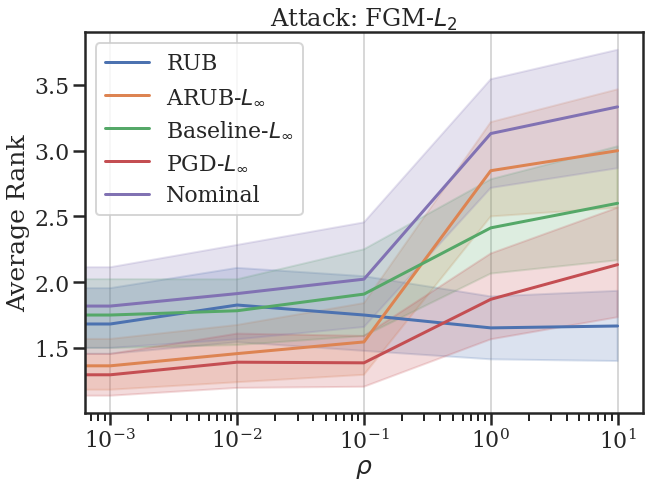

In [ ]:
df_results_norm["rank"] = df_results_norm.groupby(['net', 'dataset','test_epsilon','attack'])["accuracy"].rank("dense", ascending=False)
for attack in ["l2_fgm_norm"]:
  for net in ['ThreeLayer']:
      fig, ax = plt.subplots(figsize=(10,7))
      plt.rcParams["font.family"] = "serif"
      #plt.figure(figsize=(10,7))
      g = sns.lineplot(x="test_epsilon", y="rank",
                      hue="robust_training",
                      data=df_results_norm[(df_results_norm.net==net) & (df_results_norm.attack==attack)]).set_title("Attack: " +attack_names[attack])

      handles, labels = ax.get_legend_handles_labels()
      ax.legend(handles=handles[0:], labels=labels[0:])
      #ax.get_legend().remove()
      plt.xscale('log')
      plt.xlabel(r"$\rho$", size = 25)
      plt.ylabel("Average Rank", size = 25)
      plt.grid(axis='x', alpha=0.75)
      sv_path = '/content/gdrive/MyDrive/ROBUSTNESS/'
      plt.savefig(sv_path +"avg_rank_"  +attack_names[attack] +"_attack_new.png" , dpi=400, bbox_inches = 'tight')

In [ ]:
def compare_time(df, attack, net ): 
    df = df[df['net'] == net]
    df = df[df['attack'] == attack]
    df_1 = df.pivot_table('images_per_second', ['dataset'], 'robust_training').reset_index()
    df_2 = df.pivot_table('std_images_per_second', ['dataset'], 'robust_training').reset_index()
    return df_1, df_2

In [ ]:
df_results

,dataset,net,learning_rate,robust_training,epsilon,epsilon_pgd_training,attack,experiment_id,test_epsilon,accuracy,images_per_second,std_images_per_second,num_features,num_examples,rank
0,20,OneLayer,0.0010,aRUB_L1,0.00001,0.1,linf_pgd,25472,0.0,100.000000,1602.172009,84.141474,73,2027,1.0
1,20,OneLayer,0.0100,aRUB_Linf,0.00010,0.1,linf_pgd,18376,0.0,100.000000,2593.947566,35.071676,73,2027,1.0
2,20,OneLayer,1.0000,RUB,0.10000,0.1,linf_pgd,7494,0.0,99.609375,58097.011357,11705.448042,73,2027,3.0
3,20,OneLayer,0.1000,grad,0.00010,0.1,linf_pgd,32533,0.0,99.804688,135048.173162,12699.484769,73,2027,2.0
4,20,OneLayer,0.1000,vanilla,0.10000,0.1,linf_pgd,7407,0.0,99.609375,165284.992163,14190.766628,73,2027,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28699,65,ThreeLayer,0.0100,aRUB_Linf,0.50000,0.1,l2_fgm,18305,10.0,13.333333,2444.643413,62.941300,280,362,1.0
28700,65,ThreeLayer,1.0000,RUB,0.00010,0.1,l2_fgm,7329,10.0,13.333333,1067.767892,72.060770,280,362,1.0
28701,65,ThreeLayer,1.0000,grad,0.00010,0.1,l2_fgm,32445,10.0,13.333333,96740.995440,8956.835600,280,362,1.0
28702,65,ThreeLayer,1.0000,vanilla,0.10000,0.1,l2_fgm,7245,10.0,13.333333,167833.066761,14411.800734,280,362,1.0


In [ ]:
df_time,  df_std = compare_time(df_results, 'linf_pgd', 'ThreeLayer')
samples_per_sec = pd.DataFrame(df_time.mean())
std_samples_per_second = pd.DataFrame(df_std.mean())
df = samples_per_sec.merge(std_samples_per_second, left_index=True, right_index = True).reset_index()
df.columns =['model', 'samples_per_sec', 'std_samples_per_second']
df['samples_per_sec'] = np.log(df['samples_per_sec'])
df['std_samples_per_second'] = np.log(df['std_samples_per_second'])
df.drop(0)

,model,samples_per_sec,std_samples_per_second
1,RUB,9.720962,8.078377
2,aRUB_L1,8.405018,4.798821
3,aRUB_Linf,8.479726,4.716144
4,grad,11.687154,9.577648
5,pgd,7.063034,2.614515
6,vanilla,12.114066,10.020405


In [ ]:
df_results_old = pd.read_csv('/content/gdrive/MyDrive/RUB-results/UCI/old.csv')

for dataset_id in list(df_datasets[(df_datasets.num_features>50) & (df_datasets.num_examples > 500)].dataset_id):
    print(dataset_id)
    print("-----------------------------------------")
    
    for net in ['ThreeLayer']:

        ss = df_results_old[(df_results_old.net == net) & (df_results_old.dataset == dataset_id) & (df_results_old.attack == 'linf_pgd')].pivot(index=['robust_training'], columns=['test_epsilon'], values=['bound'])
        display(ss)

20
-----------------------------------------


bound                            ...                            
test_epsilon    0.0000 0.0002 0.0005      0.0008  ... 0.1000 0.3000 0.5000 1.0000
robust_training                                   ...                            
RUB              100.0  100.0  100.0   99.804688  ...    0.0    0.0    0.0    0.0
aRUB_L1          100.0  100.0  100.0  100.000000  ...    0.0    0.0    0.0    0.0
aRUB_Linf        100.0  100.0  100.0   99.218750  ...    0.0    0.0    0.0    0.0
pgd              100.0  100.0  100.0   99.804688  ...    0.0    0.0    0.0    0.0
vanilla          100.0  100.0  100.0  100.000000  ...    0.0    0.0    0.0    0.0

[5 rows x 13 columns]

24
-----------------------------------------


bound                        ...                     
test_epsilon        0.0000     0.0002     0.0005  ... 0.3000 0.5000 1.0000
robust_training                                   ...                     
RUB              98.789062  98.789062  98.515625  ...    0.0    0.0    0.0
aRUB_L1          98.593750  98.593750  98.281250  ...    0.0    0.0    0.0
aRUB_Linf        99.531250  99.531250  98.789062  ...    0.0    0.0    0.0
pgd              99.531250  99.531250  99.414062  ...    0.0    0.0    0.0
vanilla          98.242188  98.125000  97.460938  ...    0.0    0.0    0.0

[5 rows x 13 columns]

35
-----------------------------------------


bound                         ...                     
test_epsilon    0.0000      0.0002     0.0005  ... 0.3000 0.5000 1.0000
robust_training                                ...                     
RUB              100.0  100.000000  99.882812  ...    0.0    0.0    0.0
aRUB_L1          100.0  100.000000  99.882812  ...    0.0    0.0    0.0
aRUB_Linf        100.0  100.000000  99.882812  ...    0.0    0.0    0.0
pgd              100.0   99.882812  99.882812  ...    0.0    0.0    0.0
vanilla          100.0  100.000000  99.882812  ...    0.0    0.0    0.0

[5 rows x 13 columns]

36
-----------------------------------------


bound                          ...                     
test_epsilon         0.0000      0.0002      0.0005  ... 0.3000 0.5000 1.0000
robust_training                                      ...                     
RUB               99.804688   99.804688   99.804688  ...    0.0    0.0    0.0
aRUB_L1          100.000000  100.000000  100.000000  ...    0.0    0.0    0.0
aRUB_Linf        100.000000  100.000000  100.000000  ...    0.0    0.0    0.0
pgd              100.000000  100.000000  100.000000  ...    0.0    0.0    0.0
vanilla          100.000000  100.000000  100.000000  ...    0.0    0.0    0.0

[5 rows x 13 columns]

61
-----------------------------------------


bound             ...                      
test_epsilon        0.0000     0.0002  ...     0.5000     1.0000
robust_training                        ...                      
RUB              95.351562  67.656250  ...  22.734375  22.734375
aRUB_L1          94.921875  64.882812  ...  22.734375  22.734375
aRUB_Linf        95.859375  22.734375  ...  22.734375  22.734375
pgd              95.390625  22.734375  ...  22.734375  22.734375
vanilla          94.921875  65.820312  ...  22.734375  22.734375

[5 rows x 13 columns]

In [ ]:
for dataset_id in list(df_datasets[(df_datasets.num_features>50) & (df_datasets.num_examples > 500)].dataset_id):
    print(dataset_id)
    print("-----------------------------------------")
    df = pd.read_csv('/content/gdrive/MyDrive/RUB-results/UCI/uci_norm.csv')
    for net in ['ThreeLayer']:
      ss = df[(df.net == net) & (df.dataset == 20) & (df.attack == 'l2_pgd_norm')].pivot(index=['robust_training'], columns=['test_epsilon'], values=['accuracy'])
      display(ss)

20
-----------------------------------------


accuracy              ...                      
test_epsilon       0.000000    0.001709  ...   4.272002   8.544004
robust_training                          ...                      
RUB              100.000000  100.000000  ...  99.765625  97.929688
aRUB_L1          100.000000  100.000000  ...  92.460938  92.460938
aRUB_Linf        100.000000  100.000000  ...  92.460938  92.460938
grad              99.804688   99.804688  ...  92.500000  92.617188
pgd              100.000000  100.000000  ...  92.460938  92.460938
vanilla          100.000000  100.000000  ...  92.460938  92.460938

[6 rows x 13 columns]

24
-----------------------------------------


accuracy              ...                      
test_epsilon       0.000000    0.001709  ...   4.272002   8.544004
robust_training                          ...                      
RUB              100.000000  100.000000  ...  99.765625  97.929688
aRUB_L1          100.000000  100.000000  ...  92.460938  92.460938
aRUB_Linf        100.000000  100.000000  ...  92.460938  92.460938
grad              99.804688   99.804688  ...  92.500000  92.617188
pgd              100.000000  100.000000  ...  92.460938  92.460938
vanilla          100.000000  100.000000  ...  92.460938  92.460938

[6 rows x 13 columns]

35
-----------------------------------------


accuracy              ...                      
test_epsilon       0.000000    0.001709  ...   4.272002   8.544004
robust_training                          ...                      
RUB              100.000000  100.000000  ...  99.765625  97.929688
aRUB_L1          100.000000  100.000000  ...  92.460938  92.460938
aRUB_Linf        100.000000  100.000000  ...  92.460938  92.460938
grad              99.804688   99.804688  ...  92.500000  92.617188
pgd              100.000000  100.000000  ...  92.460938  92.460938
vanilla          100.000000  100.000000  ...  92.460938  92.460938

[6 rows x 13 columns]

36
-----------------------------------------


accuracy              ...                      
test_epsilon       0.000000    0.001709  ...   4.272002   8.544004
robust_training                          ...                      
RUB              100.000000  100.000000  ...  99.765625  97.929688
aRUB_L1          100.000000  100.000000  ...  92.460938  92.460938
aRUB_Linf        100.000000  100.000000  ...  92.460938  92.460938
grad              99.804688   99.804688  ...  92.500000  92.617188
pgd              100.000000  100.000000  ...  92.460938  92.460938
vanilla          100.000000  100.000000  ...  92.460938  92.460938

[6 rows x 13 columns]

61
-----------------------------------------


accuracy              ...                      
test_epsilon       0.000000    0.001709  ...   4.272002   8.544004
robust_training                          ...                      
RUB              100.000000  100.000000  ...  99.765625  97.929688
aRUB_L1          100.000000  100.000000  ...  92.460938  92.460938
aRUB_Linf        100.000000  100.000000  ...  92.460938  92.460938
grad              99.804688   99.804688  ...  92.500000  92.617188
pgd              100.000000  100.000000  ...  92.460938  92.460938
vanilla          100.000000  100.000000  ...  92.460938  92.460938

[6 rows x 13 columns]

In [ ]:
df_results = pd.read_csv('/content/gdrive/MyDrive/RUB-results/vision/vision_new.csv')

In [ ]:
df_results = change_names(df_results)

In [ ]:
#epsilon_list = [0.0000,	0.01399999999999999856,		0.05599999999999999423,	0.28000000000000002665,2.80000000000000026645,	8.4000,	14.0000,	28.0000]
epsilon_list = [0.000 ,          0.001 ,          0.003 ,          0.010 ,        0.100 ,           0.300 ,           0.500 ,           1.000]
#epsilon_list = [0.0000,	0.01108512516844081634,	0.05542562584220406957,	0.55425625842204073734,5.54256258422040737344  , 16.62768775266122034395 , 27.71281292110203864354 , 55.42562584220407728708]

#& (df_results.test_epsilon.isin(epsilon_list))
# (df_results['test_epsilon'].isin(epsilon_list))
def bold_extreme_values(data, format_string="%.2f", max_=True):
    if max_:
        extrema = data != data.max()
    bolded = data.apply(lambda x : "\\textbf{%s}" % format_string % x)
    formatted = data.apply(lambda x : format_string % x)
    return formatted.where(extrema, bolded) 


attack = 'linf_pgd'
# & (df_results['test_epsilon'].isin(epsilon_list))
for dd in ["MNIST",'Fashion','CIFAR']:
    ss = df_results[(df_results.dataset==dd)&(df_results.net == 'ThreeLayer') & (df_results.attack == attack)& (df_results['test_epsilon'].isin(epsilon_list))].pivot(index=['robust_training'], columns=['test_epsilon'], values=['accuracy'])
    for col in ss.columns.get_level_values(0).unique():
        ss[col] = ss[col].apply(lambda data : bold_extreme_values(data),axis=0)
        
    print(dd)
    with pd.option_context('display.max_rows', None,
                'display.max_columns', None,
                'display.precision', 2,
                ):
        #display(ss)
        print(ss.to_latex(index=True, bold_rows= False,escape=False))  


MNIST
\begin{tabular}{lllllllll}
\toprule
{} & \multicolumn{8}{l}{accuracy} \\
test_epsilon &        0.00e+00 &        1.00e-03 &        3.00e-03 &        1.00e-02 &        1.00e-01 &        3.00e-01 &        5.00e-01 &        1.00e+00 \\
robust_training     &                 &                 &                 &                 &                 &                 &                 &                 \\
\midrule
ARUB-$L_1$          &  \textbf{99.14} &  \textbf{99.02} &  \textbf{98.87} &           98.44 &           87.97 &           61.88 &           59.61 &           54.77 \\
ARUB-$L_\infty$     &           98.91 &           98.83 &           98.71 &  \textbf{98.79} &           97.42 &           91.52 &           80.98 &           49.69 \\
Baseline-$L_\infty$ &           98.59 &           98.09 &           98.63 &           97.66 &           84.69 &           65.08 &           63.24 &           59.49 \\
Nominal             &           98.05 &           97.97 &           97.85 &         

In [ ]:
df_results.test_epsilon in epsilon_list

ValueError: ignored

In [ ]:
#To latex
print(ss.to_latex(index=True, bold_rows= False,escape=False))  

\begin{tabular}{llllllllllllll}
\toprule
{} & \multicolumn{13}{l}{accuracy} \\
test_epsilon &          0.0000 &          0.0002 &          0.0005 &          0.0008 &          0.0010 &          0.0015 &          0.0020 &          0.0030 &          0.0100 &          0.1000 &          0.3000 &          0.5000 &          1.0000 \\
robust_training &                 &                 &                 &                 &                 &                 &                 &                 &                 &                 &                 &                 &                 \\
\midrule
RUB             &           48.20 &           47.89 &           47.30 &           46.91 &           46.41 &           45.47 &           44.61 &           41.48 &           31.52 &           13.48 &  \textbf{10.12} &  \textbf{10.12} &  \textbf{10.12} \\
aRUB_L1         &           49.30 &  \textbf{49.14} &           48.40 &           47.62 &           47.23 &  \textbf{46.33} &           45.55 &           42

In [ ]:
df_results['test_epsilon'].unique()
#0, 0.011085125168440816,	0.027712812921102038, 5.542562584220407,	16.62768775266122,	27.71281292110204,	55.42562584220408

array([0.00000000e+00, 2.00000000e-04, 5.00000000e-04, 8.00000000e-04,
       1.00000000e-03, 1.50000000e-03, 2.00000000e-03, 3.00000000e-03,
       1.00000000e-02, 1.00000000e-01, 3.00000000e-01, 5.00000000e-01,
       1.00000000e+00, 5.60000000e-03, 1.40000000e-02, 2.24000000e-02,
       2.80000000e-02, 4.20000000e-02, 5.60000000e-02, 8.40000000e-02,
       2.80000000e-01, 2.80000000e+00, 8.40000000e+00, 1.40000000e+01,
       2.80000000e+01, 1.10851252e-02, 2.77128129e-02, 4.43405007e-02,
       5.54256258e-02, 8.31384388e-02, 1.10851252e-01, 1.66276878e-01,
       5.54256258e-01, 5.54256258e+00, 1.66276878e+01, 2.77128129e+01,
       5.54256258e+01])

In [ ]:
attack = 'linf_pgd'

for dd in ["CIFAR"]:#,'Fashion','CIFAR']:
    df = df_results[df_results['test_epsilon'].isin([0, 0.01,	0.1,	0.3,	0.5,	1])]
    ss = df[(df.dataset==dd)&(df.net == 'ThreeLayer') & (df.attack == attack)].pivot(index=['robust_training'], columns=['test_epsilon'], values=['accuracy'])
    for col in ss.columns.get_level_values(0).unique():
        ss[col] = ss[col].apply(lambda data : bold_extreme_values(data),axis=0)
        
    print(dd)
    with pd.option_context('display.max_rows', None,
                'display.max_columns', None,
                'display.precision', 1,
                ):
        #display(ss)
        print(ss.to_latex(index=True, bold_rows= False,escape=False))  


CIFAR
\begin{tabular}{lllllll}
\toprule
{} & \multicolumn{6}{l}{accuracy} \\
test_epsilon &         0.0e+00 &         1.0e-02 &         1.0e-01 &         3.0e-01 &         5.0e-01 &         1.0e+00 \\
robust_training &                 &                 &                 &                 &                 &                 \\
\midrule
RUB             &           46.37 &           41.72 &           20.59 &            9.65 &            9.65 &            9.65 \\
aRUB_L1         &           47.66 &  \textbf{41.84} &           23.01 &           10.74 &           10.12 &           10.12 \\
aRUB_Linf       &           45.74 &           40.82 &           24.06 &           11.05 &           11.17 &           11.05 \\
grad            &           46.33 &           39.22 &            9.92 &            9.92 &            9.92 &            9.92 \\
pgd             &           46.56 &           40.82 &  \textbf{26.80} &  \textbf{15.70} &  \textbf{12.93} &  \textbf{12.58} \\
vanilla         &  \textbf{4

In [ ]:
cnn = pd.read_csv('/content/gdrive/MyDrive/RUB-results/vision/vision.csv')

In [ ]:
cnn['net'].unique()

array(['ThreeLayer'], dtype=object)

In [ ]:
df_results[(df_results['robust_training']== 'RUB') & (df_results['attack']== 'linf_pgd')]

,learning_rate,net,dataset,standarize,robust_training,epsilon,epsilon_pgd_training,attack,experiment_id,test_epsilon,accuracy
308,0.0010,ThreeLayer,MNIST,True,RUB,0.10000,0.1,linf_pgd,1529,0.0000,98.085938
314,0.0010,ThreeLayer,MNIST,True,RUB,0.10000,0.1,linf_pgd,1529,0.0002,98.085938
320,0.0010,ThreeLayer,MNIST,True,RUB,0.10000,0.1,linf_pgd,1529,0.0005,98.085938
326,0.0010,ThreeLayer,MNIST,True,RUB,0.10000,0.1,linf_pgd,1529,0.0008,98.085938
332,0.0010,ThreeLayer,MNIST,True,RUB,0.10000,0.1,linf_pgd,1529,0.0010,98.085938
338,0.0010,ThreeLayer,MNIST,True,RUB,0.10000,0.1,linf_pgd,1529,0.0015,98.085938
344,0.0010,ThreeLayer,MNIST,True,RUB,0.10000,0.1,linf_pgd,1529,0.0020,98.046875
350,0.0010,ThreeLayer,MNIST,True,RUB,0.10000,0.1,linf_pgd,1529,0.0030,97.968750
356,0.0010,ThreeLayer,MNIST,True,RUB,0.10000,0.1,linf_pgd,1529,0.0100,97.382812
362,0.0010,ThreeLayer,MNIST,True,RUB,0.01000,0.1,linf_pgd,1528,0.1000,83.125000


In [ ]:
df_bound = pd.read_csv('/content/gdrive/MyDrive/RUB-results/UCI/bound_approx.csv')
print(df_bound.to_latex(index=True, bold_rows= False,escape=False))  

\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
{} &       0.0 &    0.0002 &    0.0005 &    0.0008 &     0.001 &    0.0015 &     0.002 &     0.003 &      0.01 &       0.1 &       0.3 &       0.5 &       1.0 \\
\midrule
0 &  0.935609 &  0.986844 &  0.987781 &  0.987490 &  0.988072 &  0.987846 &  0.986941 &  0.987296 &  0.984322 &  0.948991 &  0.862199 &  0.803142 &  0.786527 \\
1 &  0.934030 &  0.989749 &  0.990493 &  0.990816 &  0.990945 &  0.990978 &  0.991042 &  0.991366 &  0.991818 &  0.990816 &  0.989458 &  0.987162 &  0.981891 \\
\bottomrule
\end{tabular}

